# Comparing Australian and Turkish Prices #

In [1]:
#%pip install numpy matplotlib
#%pip install pandas

In [2]:
from IPython.display import display, Markdown
def md(s):
    display(Markdown(s))

import numpy as np

# Price comparison between Australia and Turkey #

In [3]:
AUnames=["Banana", "Onion", "Beef Mince", "Milk", "Egg",      "Rice", "Petrol"]
TRnames=["Muz",    "Sogan", "Kiyma",        "Sut", "Yumurta", "Pirinc", "Benzin"]
Units=["kg",          "kg",   "kg",         "lt", "ea",           "kg", "lt"]

Descriptions:
* Ithal muz
* Regular beef mince
* Baldo pirinc
* Pinar sut
* Yumurta 15lik paket
* Norco full cream milk 2L
* Coles free range eggs 12-pack
* Coles long grain rice

In [4]:
import pandas as pd

df = pd.read_csv('data/prices.csv')
# Copy the first row into a string array "Names"
Names = df.columns.values
AUnames = Names[2:9]
TRnames = Names[9:16]
# Starting from row #3, copy the first column into a string array "Dates"
Dates = df['Date'].values[1:]
# Read the columns 2 to 8 into a numpy array "AUs"
AUs = df[AUnames].values[1:]
# Read the columns 9 to 15 into a numpy array "TRs"
TRs = df[TRnames].values[1:]
# Read the valus 2 to 8 in Row #2 into a numpy array "AU_Multipliers"
AU_Multipliers = df[AUnames].values[0]
# Read the values 9 to 15 in Row #2 into a numpy array "TR_Multipliers"
TR_Multipliers = df[TRnames].values[0]
# Starting from Row #2, read the second column into a numpy array "Xrate"
Xrate = df['Exchange Rate'].values[1:]

In [5]:
import datetime
ndate=len(Dates)-1
# date_str = Dates[ndate]
# date_obj = datetime.datetime.strptime(date_str, "%d/%m/%Y")
# formatted_date = date_obj.strftime("%d-%m-%y")


def showprices(Language, n, tabulate=False):
    date_str=Dates[n]
    date_obj = datetime.datetime.strptime(date_str, "%d/%m/%Y")
    formatted_date = date_obj.strftime("%d-%m-%y")
    if Language=="English":
        names=AUnames
    else:
        names=TRnames

    Names="|"+formatted_date+"|"
    Bars="|---|"
    for i in range(len(names)):
        Names+=names[i]+"|"
        Bars+="---|"
    s=Names+"AT Index|\n"+Bars+"---|"
        
 
    s+="\n|AU"
    for i in range(len(AUnames)):
        s+="|"+"{:.2f}".format(AUs[n][i]*Xrate[n]/AU_Multipliers[i])
    # s+="|\n"
    s+="|.|\n|TR"
    for i in range(len(TRnames)):
        s+="|"+"{:.2f}".format(TRs[n][i]/TR_Multipliers[i])
    s+="|.|\n"
    s+="|%.2f"%Xrate[n]
    divided_list = (AUs[n]*Xrate[n]/AU_Multipliers)/ (TRs[n]/TR_Multipliers)
    HGindex=sum(divided_list)/len(divided_list)
    for i in range(len(AUnames)):
        s+="|"+"{:.2f}".format(divided_list[i])
    s+="|"+"{:.2f}".format(HGindex)
    if tabulate:
        md(s)
    return HGindex


In [6]:
nrow=len(Dates)-1

In [7]:
showprices("English",nrow, tabulate=True)


|11-05-25|Banana|Onion|Beef Mince|Milk|Egg|Rice|Petrol|AT Index|
|---|---|---|---|---|---|---|---|---|
|AU|111.83|62.12|273.35|55.91|12.84|44.73|39.49|.|
|TR|89.95|11.95|589.95|49.95|10.33|74.95|45.27|.|
|24.85|1.24|5.20|0.46|1.12|1.24|0.60|0.87|1.53

np.float64(1.5337993683324058)

In [8]:
showprices("Turkish",nrow, tabulate=True)

|11-05-25|Muz|Sogan|Kiyma|Sut|Yumurta|Pirinc|Benzin|AT Index|
|---|---|---|---|---|---|---|---|---|
|AU|111.83|62.12|273.35|55.91|12.84|44.73|39.49|.|
|TR|89.95|11.95|589.95|49.95|10.33|74.95|45.27|.|
|24.85|1.24|5.20|0.46|1.12|1.24|0.60|0.87|1.53

np.float64(1.5337993683324058)

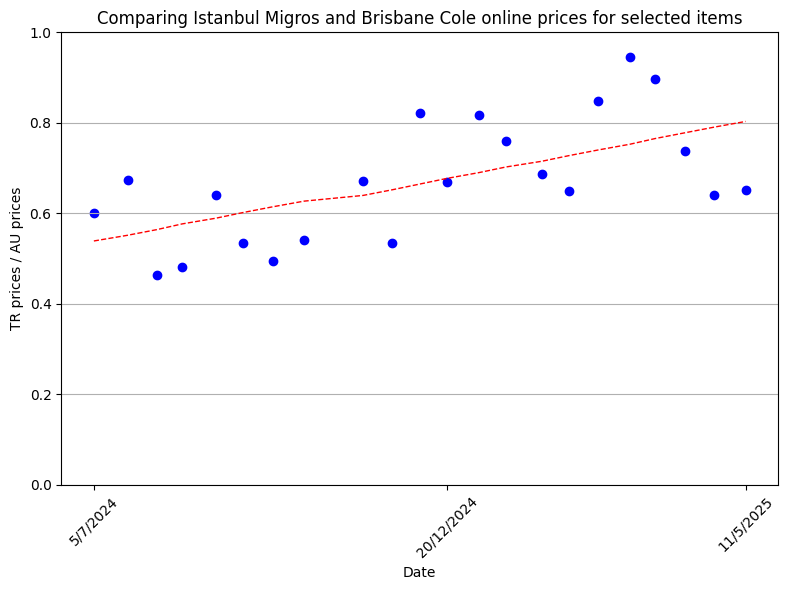

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming Dates and showprices are defined earlier
ATindex = np.zeros(len(Dates))
TAindex = np.zeros(len(Dates))
for n in range(len(Dates)):
    ATindex[n] = showprices("English", n, tabulate=False)
    TAindex[n] = 1 / ATindex[n]

# Convert dates to pandas datetime
dates = pd.to_datetime(Dates, dayfirst=True)
y = TAindex

# Fit a linear polynomial to the data
z = np.polyfit(range(len(dates)), y, 1)
p = np.poly1d(z)

# Select ticks at start, middle, and end
tick_indices = [0, len(dates) // 2, len(dates) - 1]
tick_values = dates[tick_indices]
tick_labels = [Dates[i] for i in tick_indices]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(dates, p(range(len(dates))), color='r', linestyle='--', linewidth=1)
plt.scatter(dates, y, color='b', marker='o')

# Set only three xticks
plt.xticks(tick_values, labels=tick_labels, rotation=45)

plt.xlabel('Date')
plt.ylabel('TR prices / AU prices')
plt.title('Comparing Istanbul Migros and Brisbane Cole online prices for selected items')
plt.grid(axis='y')
plt.ylim(0.0, 1.0)
plt.tight_layout()  # Helps with label spacing
plt.show()

In [10]:
print(Names)
print(AUnames)
print(TRnames)
print(Dates)
print(AUs)
print(TRs)
print(AU_Multipliers)
print(TR_Multipliers)
print(Xrate)

['Date' 'Exchange Rate' 'Banana' 'Onion' 'Beef Mince' 'Milk' 'Egg' 'Rice'
 'Petrol' 'Muz' 'Sogan' 'Kiyma' 'Sut' 'Yumurta' 'Pirinc' 'Benzin']
['Banana' 'Onion' 'Beef Mince' 'Milk' 'Egg' 'Rice' 'Petrol']
['Muz' 'Sogan' 'Kiyma' 'Sut' 'Yumurta' 'Pirinc' 'Benzin']
['5/7/2024' '21/7/2024' '4/8/2024' '16/8/2024' '1/9/2024' '14/9/2024'
 '28/9/2024' '13/10/2024' '10/11/2024' '24/11/2024' '7/12/2024'
 '20/12/2024' '4/1/2025' '17/1/2025' '3/2/2025' '16/2/2025' '2/3/2025'
 '17/3/2025' '29/3/2025' '12/4/2025' '26/4/2025' '11/5/2025']
[[ 4.     2.    11.     4.2    5.6    1.8    1.78 ]
 [ 4.     2.5   11.     4.2    5.2    1.8    1.73 ]
 [ 4.3    3.6   11.     4.2    5.2    1.8    1.96 ]
 [ 6.     3.6   11.     4.2    5.2    1.8    1.72 ]
 [ 6.     2.5   11.     4.2    5.7    1.8    1.92 ]
 [ 6.     2.5   11.     4.2    5.7    1.8    1.66 ]
 [ 4.     3.6   11.     4.2    5.7    1.8    1.59 ]
 [ 4.     3.2    9.     4.2    5.7    1.8    1.8  ]
 [ 4.5    2.5   11.     3.95   5.7    1.8    1.82 ]
 [ 4.